In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [52]:
firstd2005 = pd.read_csv("/Users/barborostasdemir/Desktop/TrafficProject/accidents_2005_to_2007.csv", low_memory=False)
secondd2009 = pd.read_csv("/Users/barborostasdemir/Desktop/TrafficProject/accidents_2009_to_2011.csv", low_memory=False)
thirdd2012 = pd.read_csv("/Users/barborostasdemir/Desktop/TrafficProject/accidents_2012_to_2014.csv", low_memory=False) 
kazalar = pd.concat([firstd2005,secondd2009,thirdd2012], axis=0)
#Bu low_memory uyarısını almanızın nedeni, her sütun için türleri tahmin etmenin çok bellek gerektirmesidir
#Herbir

In [53]:
kazalar.head(10)
#İlk 10 veriyi çağırıyoruz.

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005


In [54]:
kazalar.shape 
# Bir dizinin şekli (shape), dizinin her boyutundaki elemanların sayısıdır.

(1504150, 33)

In [55]:
kazalar.dtypes
# veri türlerinin ne olduğunu öğreniyoruz.

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [56]:
kazalar.isnull().sum() 
# null değerlerin toplamını alıyoruz.

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [57]:
kazalar=kazalar.loc[:,["Accident_Severity","Number_of_Casualties","Day_of_Week","Date","Time","Local_Authority_(District)"
                         ,"Local_Authority_(Highway)","Road_Type","Urban_or_Rural_Area","Speed_limit","Light_Conditions","Weather_Conditions",
                        "Road_Surface_Conditions","Year"]]
#Loc komutu ile etiket kullananarak verimize ulaşırken, iloc komutunda satır ve sütün index numarası ile verilerimize ulaşmaktayız

In [58]:
kazalar.tail(10)
#sondan 10 değeri çağırmak için kullanırız.

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Urban_or_Rural_Area,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
464687,3,1,2,24/11/2014,06:50,917,S12000006,Dual carriageway,2,70,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2014
464688,1,3,3,25/11/2014,15:30,917,S12000006,Single carriageway,2,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2014
464689,3,1,4,03/12/2014,19:30,917,S12000006,Single carriageway,2,60,Darkeness: No street lighting,Fog or mist,Wet/Damp,2014
464690,3,1,7,06/12/2014,03:00,917,S12000006,Single carriageway,2,40,Darkeness: No street lighting,Other,Wet/Damp,2014
464691,3,1,2,08/12/2014,09:16,917,S12000006,Dual carriageway,2,70,Daylight: Street light present,Fine without high winds,Snow,2014
464692,2,1,1,07/12/2014,22:20,917,S12000006,Dual carriageway,2,70,Darkeness: No street lighting,Snowing without high winds,Snow,2014
464693,3,2,5,11/12/2014,06:40,917,S12000006,Dual carriageway,2,70,Darkeness: No street lighting,Fine without high winds,Snow,2014
464694,3,1,3,09/12/2014,02:00,917,S12000006,Single carriageway,2,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2014
464695,2,2,4,17/12/2014,06:55,917,S12000006,Single carriageway,2,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2014
464696,3,2,4,24/12/2014,15:00,917,S12000006,Single carriageway,2,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2014


In [59]:
kazalar.isnull().sum()

Accident_Severity                0
Number_of_Casualties             0
Day_of_Week                      0
Date                             0
Time                           117
Local_Authority_(District)       0
Local_Authority_(Highway)        0
Road_Type                        0
Urban_or_Rural_Area              0
Speed_limit                      0
Light_Conditions                 0
Weather_Conditions             126
Road_Surface_Conditions       1958
Year                             0
dtype: int64

In [60]:
kazalar = kazalar.dropna()
kazalar.shape
#Herhangi bir satırda NaN değeri varsa o satırı sil demek

(1501957, 14)

In [61]:
kazalar.isnull().sum()
#Bakın gördüğünüz üzere hiç null değerimiz kalmadı.

Accident_Severity             0
Number_of_Casualties          0
Day_of_Week                   0
Date                          0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
Road_Type                     0
Urban_or_Rural_Area           0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Year                          0
dtype: int64

In [62]:
kazalar.dtypes
#Daha sonra veri türlerini yeniden kontrol ediyoruz.

Accident_Severity              int64
Number_of_Casualties           int64
Day_of_Week                    int64
Date                          object
Time                          object
Local_Authority_(District)     int64
Local_Authority_(Highway)     object
Road_Type                     object
Urban_or_Rural_Area            int64
Speed_limit                    int64
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
Year                           int64
dtype: object

In [63]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
selRows = kazalar[kazalar['Time'].isna()].index
kazalar = kazalar.drop(selRows,axis=0)
kazalar["Time"] = pd.to_datetime(kazalar["Time"],format='%H:%M')
kazalar["Hour"] = kazalar["Time"].dt.hour
kazalar["Month"]  = pd.DatetimeIndex(kazalar["Date"]).month 

In [64]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Urban_or_Rural_Area                    int64
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                   int64
Hour                                   int64
Month                                  int64
dtype: object

In [65]:
kazalar["Year"].unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014])

In [66]:
kazalar.Year = kazalar.Year.astype(str)
kaza_sayisi = kazalar.groupby("Year")

In [67]:
toplam_kaza_sayisi = pd.DataFrame(kaza_sayisi.size().sort_values(ascending=False),columns=["Sayı"])

In [68]:
toplam_kaza_sayisi.head()

,Sayı
Year,
2005,198474
2006,188913
2007,181881
2012,179436
2009,163334


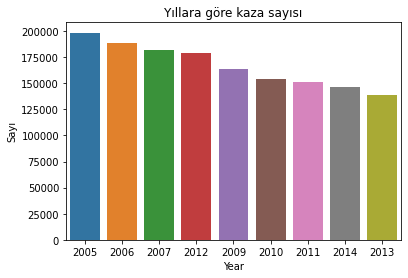

In [69]:
sns.barplot(y = toplam_kaza_sayisi["Sayı"], x = toplam_kaza_sayisi.index)
plt.title("Yıllara göre kaza sayısı");
# seaborn: istatistiksel veri görselleştirme bunun için kullanıyoruz
# y değerine toplam kaza değerlerini "sayı" değerini getiriyoruz x se ise toplam kaza yıllarını

## Can we predict accident rates over time?

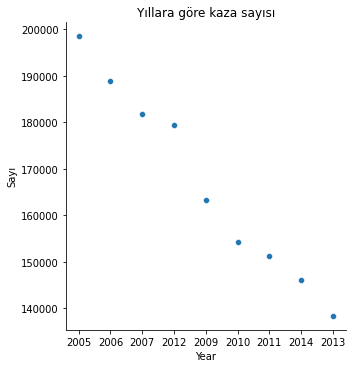

In [70]:
sns.relplot(y = toplam_kaza_sayisi["Sayı"], x = toplam_kaza_sayisi.index)
plt.title("Yıllara göre kaza sayısı");
#Bir başka şekilde grafik analizi yapmak istersek
#Yıllar geçtikçe kaza sayısını düştüğünü rahat bir şekilde gözlemliyoruz.

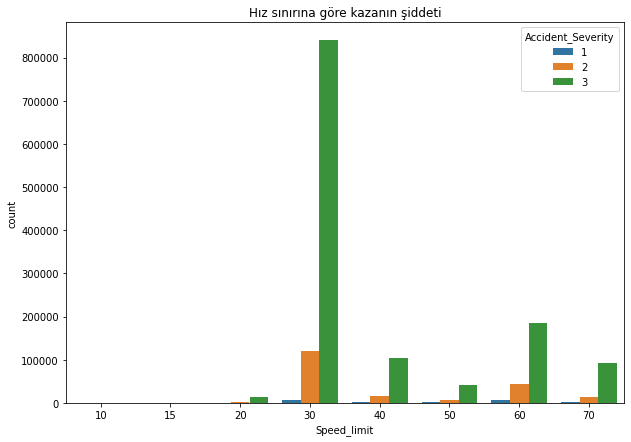

In [71]:
plt.figure(figsize=(10,7))
sns.countplot(x="Speed_limit",hue="Accident_Severity",data=kazalar)
plt.title("Hız sınırına göre kazanın şiddeti")
plt.show()

In [72]:
kazalar["Light_Conditions"].unique()
#Döngünün içindeki koşul, geçerli yineleme sayısının listede olup olmadığını kontrol eder unique 


array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [73]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Urban_or_Rural_Area                    int64
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                  object
Hour                                   int64
Month                                  int64
dtype: object

In [74]:
kazalar.Hour = kazalar.Hour.astype(str) # Veri türünü str yapmak için kullanıyoruz.
kazalar.Month = kazalar.Month.astype(str)

## What increases accident rates?

- Kaza oranlarını ne artırır? 

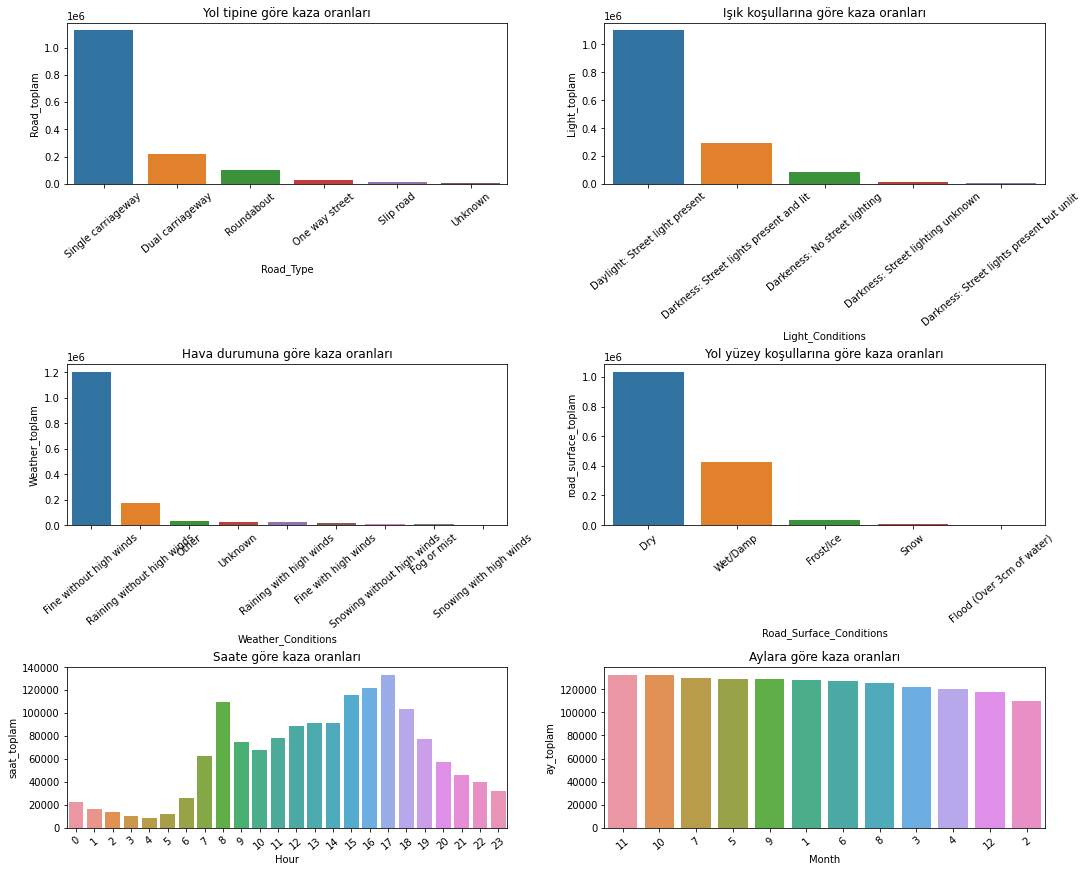

In [115]:
f, axs = plt.subplots(3,2, figsize = (15,12), constrained_layout = True)

road_sayisi = kazalar.groupby("Road_Type")
toplam_road=pd.DataFrame(road_sayisi.size().sort_values(ascending=False),columns=["Road_toplam"])
light_sayisi = kazalar.groupby("Light_Conditions")
toplam_light=pd.DataFrame(light_sayisi.size().sort_values(ascending=False),columns=["Light_toplam"])
weather_sayisi = kazalar.groupby("Weather_Conditions")
toplam_weather=pd.DataFrame(weather_sayisi.size().sort_values(ascending=False),columns=["Weather_toplam"])
surface_sayisi = kazalar.groupby("Road_Surface_Conditions")
toplam_surface=pd.DataFrame(surface_sayisi.size().sort_values(ascending=False),columns=["road_surface_toplam"])
saat_sayisi = kazalar.groupby("Hour")
toplam_saat=pd.DataFrame(saat_sayisi.size().sort_values(ascending=False),columns=["saat_toplam"])
ay_sayisi = kazalar.groupby("Month")
toplam_ay=pd.DataFrame(ay_sayisi.size().sort_values(ascending=False),columns=["ay_toplam"])
                       

ax=sns.barplot(x=toplam_road.index, y=toplam_road["Road_toplam"], data=toplam_road, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 40)
ax=sns.barplot(x=toplam_light.index,y=toplam_light["Light_toplam"], data=toplam_light, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 40)
ax=sns.barplot(x=toplam_weather.index,y=toplam_weather["Weather_toplam"], data=toplam_weather, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 40)
ax=sns.barplot(x=toplam_surface.index,y=toplam_surface["road_surface_toplam"], data=toplam_surface, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 40)
ax=sns.barplot(x=toplam_saat.index,y=toplam_saat["saat_toplam"], data = toplam_saat, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 40)
ax=sns.barplot(x=toplam_ay.index,y=toplam_ay["ay_toplam"], data=toplam_ay, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 40)

axs[0, 0].title.set_text('Yol tipine göre kaza oranları')
axs[0, 1].title.set_text('Işık koşullarına göre kaza oranları')
axs[1, 0].title.set_text('Hava durumuna göre kaza oranları')
axs[1, 1].title.set_text('Yol yüzey koşullarına göre kaza oranları')
axs[2, 0].title.set_text('Saate göre kaza oranları')
axs[2, 1].title.set_text('Aylara göre kaza oranları')




In [76]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Urban_or_Rural_Area                    int64
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                  object
Hour                                  object
Month                                 object
dtype: object

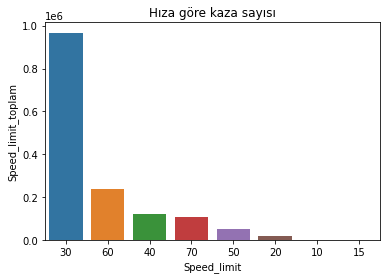

In [77]:
kazalar.Speed_limit = kazalar.Speed_limit.astype(str) #Bunu yapmamızın en önemli sebebi değerin okunabilir değer olarak plt değerini göstermek.
speed_sayisi = kazalar.groupby("Speed_limit")
toplam_speed = pd.DataFrame(speed_sayisi.size().sort_values(ascending=False),columns = ["Speed_limit_toplam"])
sns.barplot(y=toplam_speed["Speed_limit_toplam"],x = toplam_speed.index)
plt.title("Hıza göre kaza sayısı");

In [78]:
kazalar["Number_of_Casualties"].unique() # yalnızca benzersiz sayılar eklenir
#kayıp değerlerini çağırıyoruz.

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54])

In [79]:
kazalar.columns # Kolum değerlerini getiriyoruz.

Index(['Accident_Severity', 'Number_of_Casualties', 'Day_of_Week', 'Date',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Road_Type', 'Urban_or_Rural_Area', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Year', 'Hour',
       'Month'],
      dtype='object')

In [80]:
kazalar.Hour = kazalar.Hour.astype(int) #saat değerni int değer yapıyoruz.

In [81]:
kazalar.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Urban_or_Rural_Area                    int64
Speed_limit                           object
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                  object
Hour                                   int64
Month                                 object
dtype: object

In [82]:
df = pd.get_dummies(kazalar, columns=['Road_Type','Weather_Conditions','Light_Conditions','Road_Surface_Conditions',
                    ])

In [83]:
df.dtypes

Accident_Severity                                                      int64
Number_of_Casualties                                                   int64
Day_of_Week                                                            int64
Date                                                                  object
Time                                                          datetime64[ns]
Local_Authority_(District)                                             int64
Local_Authority_(Highway)                                             object
Urban_or_Rural_Area                                                    int64
Speed_limit                                                           object
Year                                                                  object
Hour                                                                   int64
Month                                                                 object
Road_Type_Dual carriageway                                             uint8

In [84]:
df.Speed_limit = df.Speed_limit.astype(int) #Speed limit obcet iken int değere çeviriyoruz.

In [85]:
yarali_sayisi = df["Number_of_Casualties"].values
kategori =[]
for num in yarali_sayisi:
    if num == 1:
        kategori.append("1 yarali")
    elif num >1 and num < 3:
        kategori.append("1 ile 3 arası")
    elif num > 3 and num< 6:
        kategori.append("3 ile 6 arası")
    elif num > 6 and num < 9:
        kategori.append("6 ile 9 arasi")
    elif num > 9 and num < 12:
        kategori.append("9 ile 12 arasi")
    else:
        kategori.append("12'den cok")
kategori = pd.DataFrame(data =kategori,columns=["Kategori"])
df = df.reset_index(drop=True)
data = pd.concat([df, kategori], axis=1)
data.drop(columns="Number_of_Casualties",axis= 1,inplace=True)    

In [86]:
data.head(10)

,Accident_Severity,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Urban_or_Rural_Area,Speed_limit,Year,Hour,...,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Kategori
0,2,3,04/01/2005,1900-01-01 17:42:00,12,E09000020,1,30,2005,17,...,0,0,0,1,0,0,0,0,1,1 yarali
1,3,4,05/01/2005,1900-01-01 17:36:00,12,E09000020,1,30,2005,17,...,0,1,0,0,1,0,0,0,0,1 yarali
2,3,5,06/01/2005,1900-01-01 00:15:00,12,E09000020,1,30,2005,0,...,0,1,0,0,1,0,0,0,0,1 yarali
3,3,6,07/01/2005,1900-01-01 10:35:00,12,E09000020,1,30,2005,10,...,0,0,0,1,1,0,0,0,0,1 yarali
4,3,2,10/01/2005,1900-01-01 21:13:00,12,E09000020,1,30,2005,21,...,1,0,0,0,0,0,0,0,1,1 yarali
5,3,3,11/01/2005,1900-01-01 12:40:00,12,E09000020,1,30,2005,12,...,0,0,0,1,0,0,0,0,1,1 yarali
6,3,5,13/01/2005,1900-01-01 20:40:00,12,E09000020,1,30,2005,20,...,0,1,0,0,1,0,0,0,0,1 yarali
7,3,6,14/01/2005,1900-01-01 17:35:00,12,E09000020,1,30,2005,17,...,0,0,0,1,1,0,0,0,0,1 ile 3 arası
8,3,7,15/01/2005,1900-01-01 22:43:00,12,E09000020,1,30,2005,22,...,0,1,0,0,1,0,0,0,0,1 ile 3 arası
9,3,7,15/01/2005,1900-01-01 16:00:00,12,E09000020,1,30,2005,16,...,0,0,0,1,1,0,0,0,0,3 ile 6 arası


In [87]:
data["Kategori"].unique()

array(['1 yarali', '1 ile 3 arası', '3 ile 6 arası', "12'den cok",
       '6 ile 9 arasi', '9 ile 12 arasi'], dtype=object)

In [88]:
data.dtypes

Accident_Severity                                                      int64
Day_of_Week                                                            int64
Date                                                                  object
Time                                                          datetime64[ns]
Local_Authority_(District)                                             int64
Local_Authority_(Highway)                                             object
Urban_or_Rural_Area                                                    int64
Speed_limit                                                            int64
Year                                                                  object
Hour                                                                   int64
Month                                                                 object
Road_Type_Dual carriageway                                             uint8
Road_Type_One way street                                               uint8

In [89]:
data.drop(columns=["Month","Year","Local_Authority_(Highway)","Local_Authority_(District)","Time","Date"], axis=1,inplace=True)

In [90]:
data.head(10)

,Accident_Severity,Day_of_Week,Urban_or_Rural_Area,Speed_limit,Hour,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,...,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Kategori
0,2,3,1,30,17,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1 yarali
1,3,4,1,30,17,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1 yarali
2,3,5,1,30,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1 yarali
3,3,6,1,30,10,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1 yarali
4,3,2,1,30,21,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1 yarali
5,3,3,1,30,12,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1 yarali
6,3,5,1,30,20,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1 yarali
7,3,6,1,30,17,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1 ile 3 arası
8,3,7,1,30,22,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1 ile 3 arası
9,3,7,1,30,16,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,3 ile 6 arası


In [91]:
data.columns

Index(['Accident_Severity', 'Day_of_Week', 'Urban_or_Rural_Area',
       'Speed_limit', 'Hour', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light pre

In [92]:
len(data.columns)

31

In [93]:
a = data.columns[:29]

In [94]:
a #Toplam kolum sayısını görmek için

Index(['Accident_Severity', 'Day_of_Week', 'Urban_or_Rural_Area',
       'Speed_limit', 'Hour', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light pre

In [95]:
data.to_csv('sonhali.csv') #dışa aktarma için kulanılan bir sistemdir.

## Tahminleme skleran selection

In [96]:
from sklearn.model_selection import train_test_split
col_isimler = a
tahmin_isimler = ['Kategori']
X = data[col_isimler].values 

y = data[tahmin_isimler].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2018)

## What Weather Conditions Cause the Most Traffic Accidents?

In [99]:
weather_cond = kazalar["Weather_Conditions"].value_counts() #Accident Rate by Weather Conditions
weather_cond

Fine without high winds       1203503
Raining without high winds     177639
Other                           33437
Unknown                         26777
Raining with high winds         20810
Fine with high winds            18347
Snowing without high winds      11300
Fog or mist                      8184
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

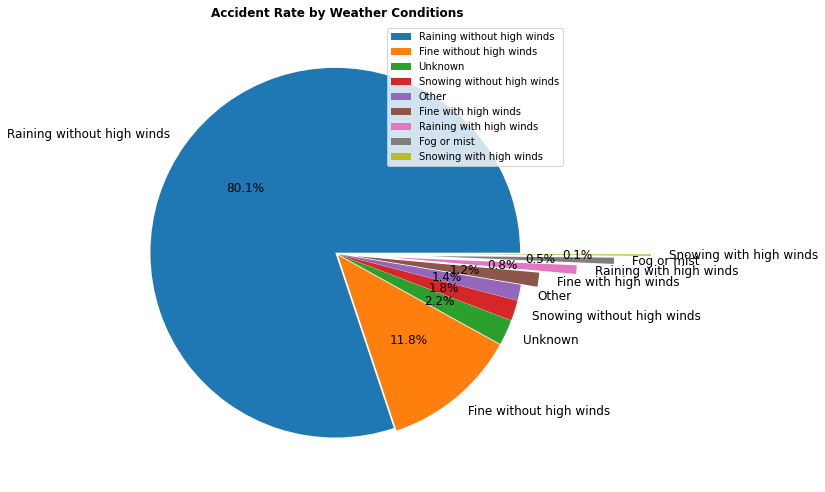

In [100]:
weather_cond_arr = kazalar["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values

plt.figure(figsize = (8.5,8.5))
plt.pie(weather_num_acc_arr, labels = weather_cond_arr,colors = sns.color_palette(),textprops={'size': 'large'},
        explode=(0.01,0.01,0.01,0.01,0.01,0.10,0.30,0.50,0.7),autopct="%1.1f%%")
plt.legend(loc="upper right")
plt.title("Accident Rate by Weather Conditions",weight="bold")
plt.show()


## What is the Difference Between Urban and Rural Area Traffic Accidents Risks?

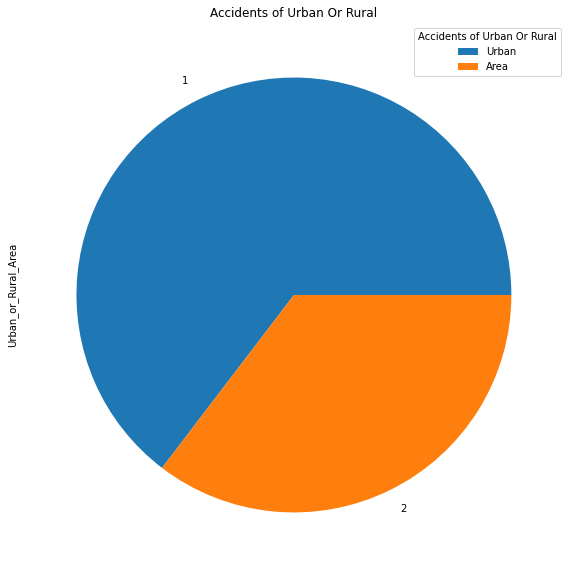

In [105]:
area = pd.DataFrame(kazalar["Urban_or_Rural_Area"].value_counts())
area = area.drop([3])

area.plot.pie(y="Urban_or_Rural_Area",figsize=[10,10])
plt.title("Accidents of Urban Or Rural")
plt.legend(title="Accidents of Urban Or Rural",labels=["Urban","Area"])